In [ ]:
%pip install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [6]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
585,2014,JEEP,GRAND CHEROKEE 4X4 DIESEL,SUV - STANDARD,3.0,6,A8,D,11.2,8.4,9.9,29,267
39,2014,AUDI,Q5,SUV - SMALL,3.0,6,AS8,Z,12.9,9.2,11.2,25,258
47,2014,AUDI,R8,TWO-SEATER,5.2,10,M6,Z,21.1,13.8,17.8,16,409
803,2014,MINI,COOPER S ROADSTER,TWO-SEATER,1.6,4,M6,Z,9.1,6.7,8.0,35,184
985,2014,TOYOTA,HIGHLANDER HYBRID AWD,SUV - STANDARD,3.5,6,AV6,X,8.0,8.6,8.3,34,191


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'MODELYEAR', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION'], axis=1)

KeyError: "['MODELYEAR', 'MAKE', 'MODEL', 'MODELYEAR', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION'] not found in axis"

In [10]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [11]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [12]:
df = df.drop(['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS'], axis=1)

In [13]:
df

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
...,...,...,...
1062,3.0,24,271
1063,3.2,25,264
1064,3.0,24,271
1065,3.2,25,260


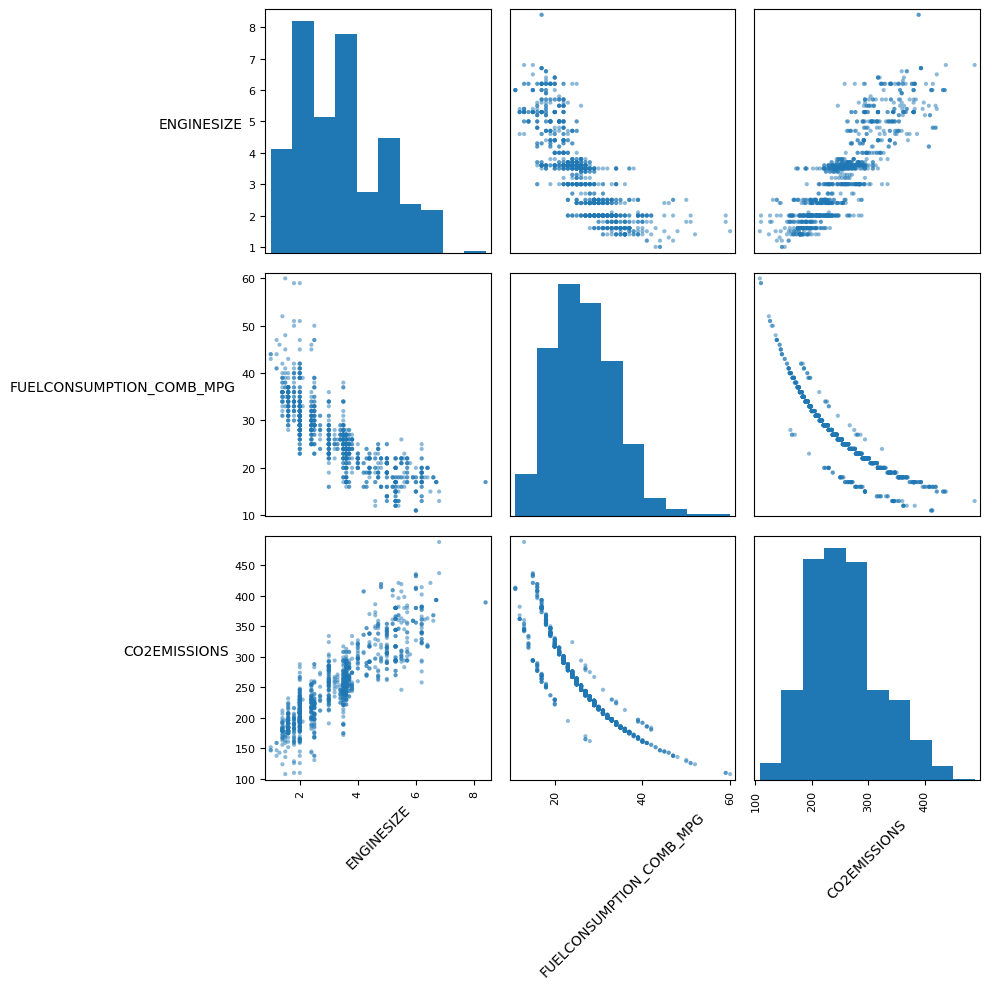

In [15]:
axes = pd.plotting.scatter_matrix(df, figsize=(10,10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.show()

In [ ]:
X = df.iloc[:, :2].to_numpy()
y = df.iloc[:, 2:].to_numpy()


array([[ 2. , 33. ],
       [ 2.4, 29. ],
       [ 1.5, 48. ],
       ...,
       [ 3. , 24. ],
       [ 3.2, 25. ],
       [ 3.2, 22. ]])

In [26]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_scaled = std_scaler.fit_transform(X)


In [27]:
pd.DataFrame(X_scaled, columns=['ENGINESIZE', 'CO2EMISSIONS'])

,ENGINESIZE,CO2EMISSIONS
0,-0.951292,0.878553
1,-0.668653,0.342734
2,-1.304591,2.887876
3,0.108606,-0.193086
4,0.108606,0.074824
...,...,...
1062,-0.244694,-0.327041
1063,-0.103374,-0.193086
1064,-0.244694,-0.327041
1065,-0.103374,-0.193086


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train)
intercept_ = regr.intercept_
coef_ = regr.coef_
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [36]:
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = regr.coef_ / std_devs_
intercept_original = regr.intercept_ - np.sum((coef_original * means_))

print('Coefficients in original scale: ', coef_original)
print('Intercept in original scale: ', intercept_original)

Coefficients in original scale:  [[17.8581369  -5.01502179]]
Intercept in original scale:  [329.1363967]


/Users/mert/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/mert/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


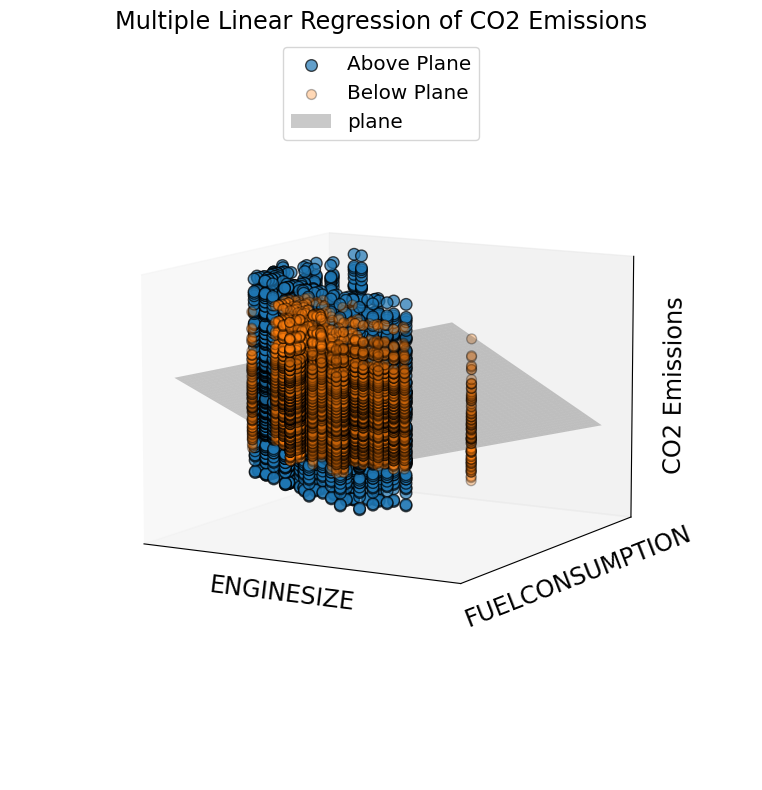

In [38]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regr.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regr.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


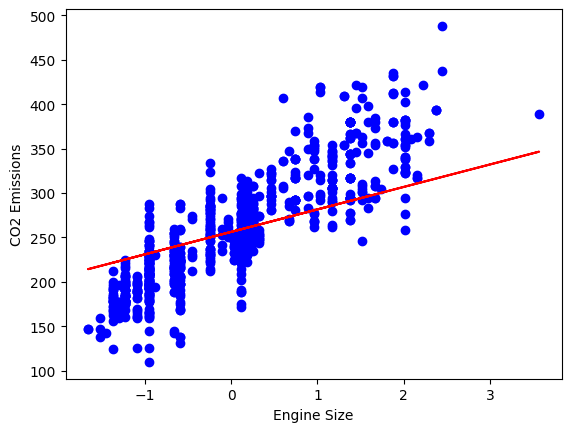

In [40]:
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.plot(X_train[:, 0], X_train[:, 0] * regr.coef_[0,0] + regr.intercept_, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

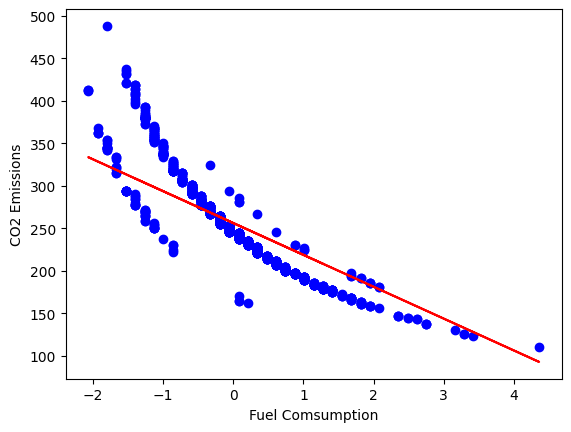

In [41]:
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 1], X_train[:, 1] * regr.coef_[0,1] + regr.intercept_, color='red')
plt.xlabel('Fuel Comsumption')
plt.ylabel('CO2 Emissions')
plt.show()